In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 학습을 통해 w값 추출

### cost test
- 실제값과 예측값의 차이

In [3]:
# cost
def cost(x,y,w):
    c = 0 
    for i in np.arange(len(x)):
        hx = w*x[i]
        c  = c+(hx-y[i])**2 # (예측값 - 실제값) * 2
    return c/len(x) 


In [4]:
x_data = [1,2,3]
y_data = [1,2,3]

# -1 : y = (-1)x
print(cost(x_data, y_data, -1))

# 0 : y = 0x
print(cost(x_data, y_data, 0))

# 1 : y = 1x
print(cost(x_data, y_data, 1))

# 2 : y = 2x
print(cost(x_data, y_data, 10))

18.666666666666668
4.666666666666667
0.0
378.0


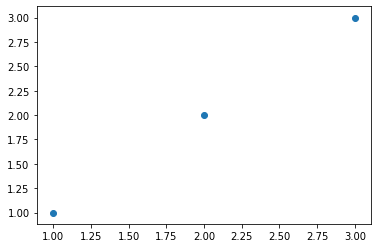

In [5]:
plt.scatter(x_data, y_data)
plt.show()

In [6]:
# linspace (start, end, 간격)
np.linspace(1,5,2)

array([1., 5.])

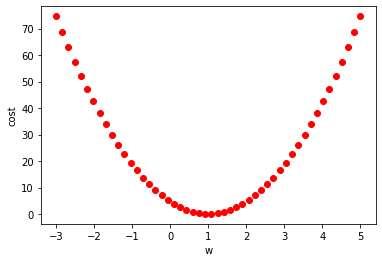

In [7]:
plt.xlabel('w')
plt.ylabel('cost')

# -3에서 5까지 50개
# 결과 1로 모이는것을 확인 => cost값이 가장 적은 지점, w 값은 1이 적절
for w in np.linspace(-3,5,50):
    c =  cost(x_data, y_data, w)
    # print(w,c)
    plt.plot(w,c,'ro')
plt.show()

### 미분 (접선의 기울기)
- y = 2   기울기   : 0
- y = x   기울기   : 1
- y = 2x  기울기   : 2
- y = x^2 기울기   : 2x

합성함수의 미분

1. t로 치환하여 t에 관해 미분
2. x에 관해 미분




In [8]:
# 특정 접점의 순간 기울기를 알아내는 함수
def gradient_descent( x,y,w ):
    c = 0
    for i in range(len(x)):
        hx = w*x[i]
        c = c + (hx-y[i]) * x[i] #편미분
    return c/len(x)

In [9]:
def show_gradient(x,y,w):
    for i in range(10): # 학습횟수
        c = cost(x,y,w)
        g = gradient_descent(x,y,w) # w가 10일때 순간 기울기값?
        print(i,c,w,g)
        w = w - 0.1*g  #0.1 (러닝메이트) * 기울기
    print("w:",w)



In [10]:
show_gradient(x_data, y_data,100)

0 45738.0 100 462.0
1 13009.919999999998 53.8 246.39999999999998
2 3700.599466666666 29.159999999999997 131.41333333333333
3 1052.6149594074066 16.01866666666666 70.08711111111108
4 299.41047734255125 9.009955555555553 37.37979259259258
5 85.1656468885479 5.271976296296295 19.93588938271604
6 24.224895114964728 3.2783873580246903 10.632474337448555
7 6.890636832701077 2.2151399242798346 5.670652979972562
8 1.9600033657460838 1.6480746262825785 3.024348255985366
9 0.5575120684788866 1.345639800684042 1.6129857365255293
w: 1.184341227031489


### w, b를 구하는 방법
1. 공식을 이용하여 구하는 방법
2. 학습을 이용하여 구하는 방법
    - w 초기값을 부여 ex) w = 5
    - w = w - a (러닝레이트) * 미분   *러닝레이트는 하이퍼파라미터

## 회귀 테스트

In [15]:
df = pd.read_csv('../data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


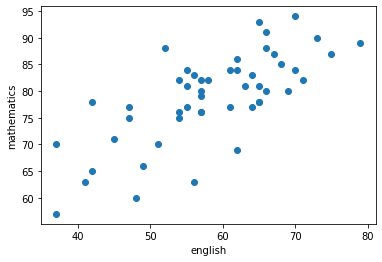

In [16]:
plt.xlabel('english')
plt.ylabel('mathematics')

plt.scatter(df['english'],df['mathematics'])
plt.show()

In [17]:
import scipy.stats as st

In [18]:
result = st.linregress(df['english'], df['mathematics'])
result


LinregressResult(slope=0.6214230159505969, intercept=42.60132432880415, rvalue=0.7237414863069241, pvalue=2.876087052282177e-09, stderr=0.08552186247949069)

In [19]:
print("기울기 : ", result.slope)
print("절편 : ", result.intercept)
print("상관계수 : ", result.rvalue)
print("회귀계수값 : ", result.pvalue)
print("표준편차 : ", result.stderr)


기울기 :  0.6214230159505969
절편 :  42.60132432880415
상관계수 :  0.7237414863069241
회귀계수값 :  2.876087052282177e-09
표준편차 :  0.08552186247949069


In [20]:
# 귀무가설 : 기울기가 0이다.     (영어점수와 수학점수에 연관성이 없다.)  
# 대립가설 : 기울기가 0이 아니다. (영어점수와 수학점수는 연관성이 있다.)
# 회귀계수값 (w,b)의미가 있냐없냐

# 회귀계수값이 0.05보다 작으면 귀무가설을 기각
# 회귀계수값이 0.05보다 크면 귀무가설을 채택

# 회귀계수값 :  2.876087052282177e-09 < 0.05
# 결론 : 회귀계수가 예측값으로 활용될수 있다.

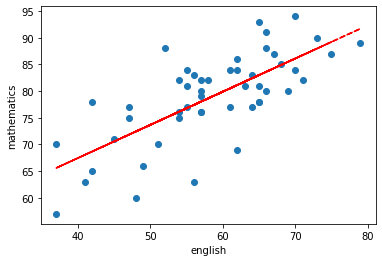

In [21]:
plt.xlabel('english')
plt.ylabel('mathematics')
plt.scatter(df['english'], df['mathematics'])

lm = result.slope*df['english'] + result.intercept # 영어점수*기울기 + 절편
plt.plot(df['english'], lm, 'r--')
plt.show()